# Proyecto Analísis en el arrendamiento de Bicicletas en Seoul

## Introduccion
El objetivo de este proyecto es analisis y modelar las variables que tienen impacto en el arriendo de bicicletas en Seoul de tal forma poder tomar decisiciones entorno a planificación de inventario, mejorar estrategias de marketing o optimizacion de rutas y estaciones.

### Hipotesis
1. El clima es lo que genera el mayor impacto en el uso de la biciclita durante el año
2. La exposición de luz solar incentiva el uso de bicicleta
3. La falta de disponibilidad se debe a factores ajenos a lo que es el clima o el horario

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
df = pd.read_csv('SeoulBikeData-Copy1.csv', encoding='latin-1')

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format= "%d/%m/%Y")
df['Week Day']=df['Date'].dt.day_name()
df['Month']= pd.DatetimeIndex(df['Date']).month

df[df['Functioning Day'] == 'No'].head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
3144 2018-04-11                  0     0             14.4           82   
3145 2018-04-11                  0     1             13.6           81   
3146 2018-04-11                  0     2             12.7           80   
3147 2018-04-11                  0     3             11.6           81   
3148 2018-04-11                  0     4             10.2           83   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
3144               4.6              1041                       11.3   
3145               3.6               886                       10.3   
3146               3.9               885                        9.3   
3147               3.1               687                        8.4   
3148               3.5               554                        7.4   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
3144                      0.0           0.0            0.0  Spring   
3145                      0.0           0.0            0.0  Spring   
3146                      0.0           0.0            0.0  Spring   
3147                      0.0           0.0            0.0  Spring   
3148                      0.0           0.0            0.0  Spring   

         Holiday Functioning Day   Week Day  Month  
3144  No Holiday              No  Wednesday      4  
3145  No Holiday              No  Wednesday      4  
3146  No Holiday              No  Wednesday      4  
3147  No Holiday              No  Wednesday      4  
3148  No Holiday              No  Wednesday      4

In [6]:
## revision de null o NaN
print(df.isna().sum())
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Week Day                     0
Month                        0
dtype: int64
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Week Day                     0
Month                     

**Limpieza y correción de nulos**

No se encuentra ninguna variable nula o ausente dentro del dataframe, por tanto no se hace tratatamiento de este

### Transformacion de variables categoricas

In [9]:
df['Holiday']=df['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)
df['Functioning Day']= df['Functioning Day'].apply(lambda x: 1 if x=='Yes' else 0)

In [10]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  Holiday  \
0                      0.0           0.0            0.0  Winter        0   
1                      0.0           0.0            0.0  Winter        0   
2                      0.0           0.0            0.0  Winter        0   
3                      0.0           0.0            0.0  Winter        0   
4                      0.0           0.0            0.0  Winter        0   

   Functioning Day Week Day  Month  
0                1   Friday     12  
1                1   Friday     12  
2                1   Friday     12  
3                1   Friday     12  
4                1   Friday     12

In [11]:
## Separando las estaciones del año
one_hot_encoded_data = pd.get_dummies(df['Seasons']) 
df = pd.concat([df, one_hot_encoded_data], axis=1)


In [12]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  Holiday  \
0                      0.0           0.0            0.0  Winter        0   
1                      0.0           0.0            0.0  Winter        0   
2                      0.0           0.0            0.0  Winter        0   
3                      0.0           0.0            0.0  Winter        0   
4                      0.0           0.0            0.0  Winter        0   

   Functioning Day Week Day  Month  Autumn  Spring  Summer  Winter  
0                1   Friday     12   False   False   False    True  
1                1   Friday     12   False   False   False    True  
2                1   Friday     12   False   False   False    True  
3                1   Friday     12   False   False   False    True  
4                1   Friday     12   False   False   False    True

# EDA

**Estudio de variables**

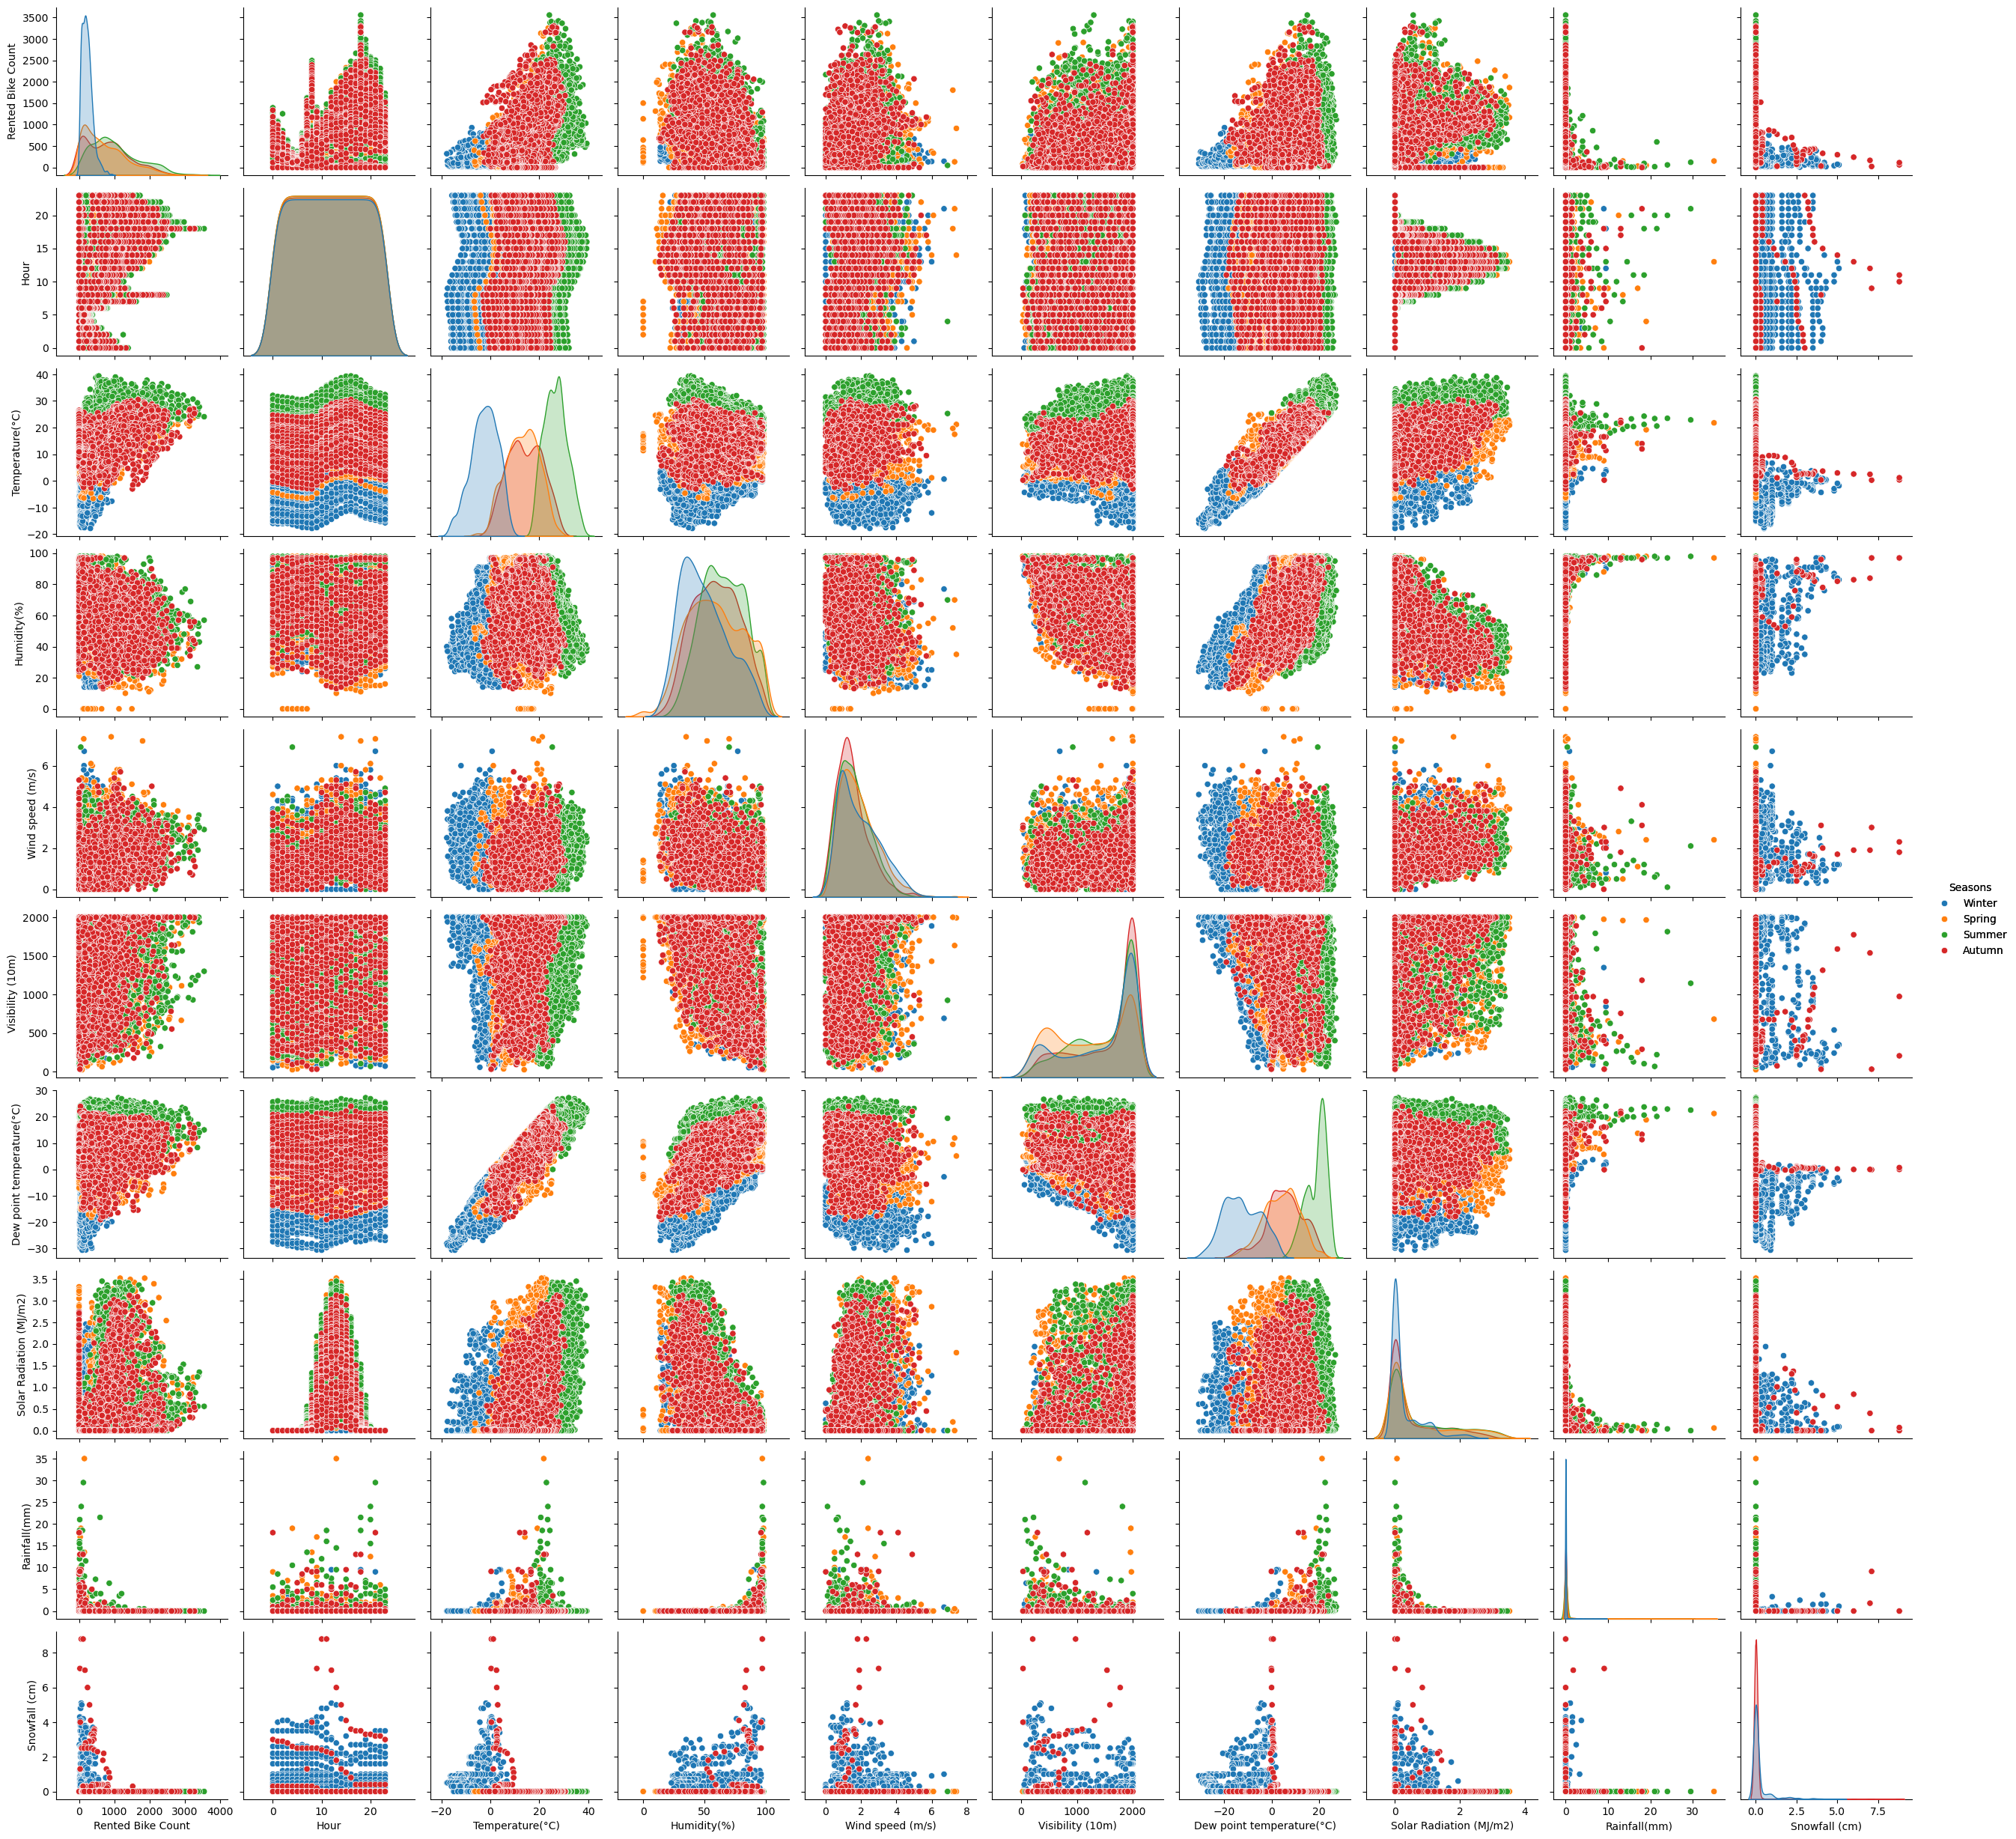

In [15]:
t = sns.pairplot(df[['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons']], hue="Seasons")
t.add_legend()

En una primera instancia, se busca analizar el comportamiento del dataframe entre sus diferentes variables. En general, se observa que la mayoría de los datos están presentes en todas las variables, a excepción de las columnas "Rainfall(mm)" y "Snowfall(mm)". Estas dos últimas columnas presentan valores condicionados por la estacionalidad, es decir, otoño e invierno.

<Axes: xlabel='Snowfall (cm)'>

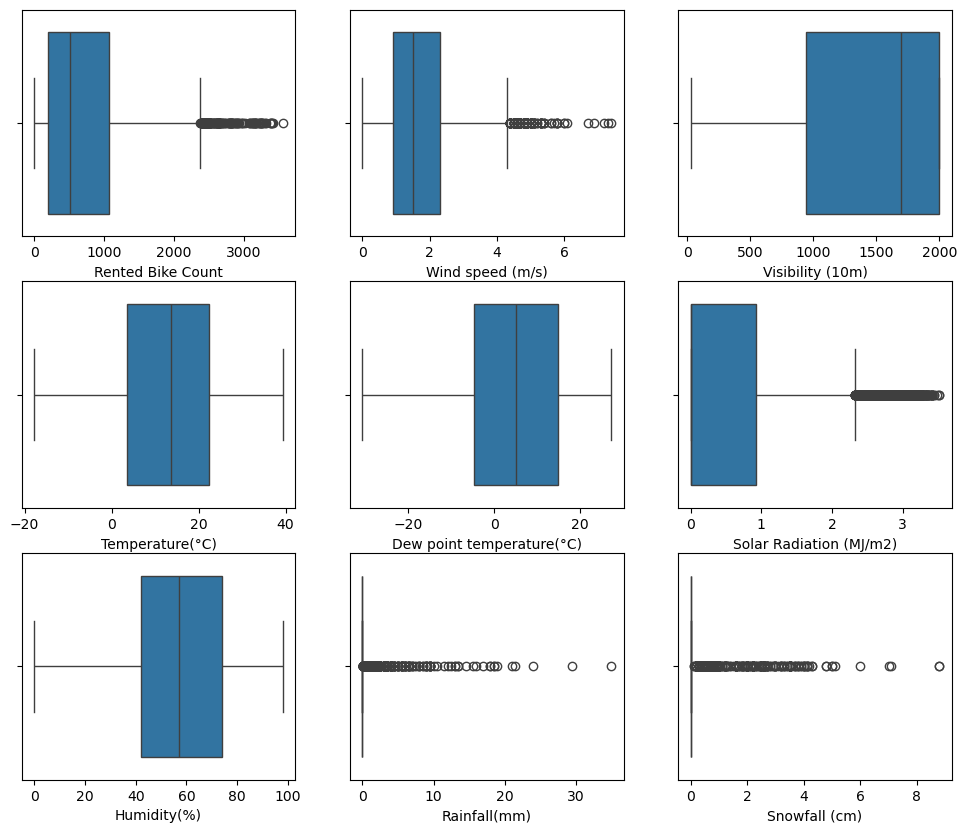

In [17]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))

sns.boxplot(x=df['Rented Bike Count'], ax=axs[0, 0])
sns.boxplot(x=df['Temperature(°C)'], ax=axs[1, 0])
sns.boxplot(x=df['Humidity(%)'], ax=axs[2, 0])
sns.boxplot(x=df['Wind speed (m/s)'], ax=axs[0, 1])
sns.boxplot(x=df['Visibility (10m)'], ax=axs[0, 2])
sns.boxplot(x=df['Dew point temperature(°C)'], ax=axs[1, 1])
sns.boxplot(x=df['Solar Radiation (MJ/m2)'], ax=axs[1, 2])
sns.boxplot(x=df['Rainfall(mm)'], ax=axs[2, 1])
sns.boxplot(x=df['Snowfall (cm)'], ax=axs[2, 2])

**Outliers:**
 Se ve la presencia de outliers en la cantidad de Bike Rented Count, Rainfall(mm) y Snowfall(cm), por tanto se eliminaran

In [19]:
Q1 = df['Rainfall(mm)'].quantile(0.25)
Q3 = df['Rainfall(mm)'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['Rainfall(mm)'] >= lower_limit) & (df['Rainfall(mm)'] <= upper_limit)]

In [20]:
Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['Rented Bike Count'] >= lower_limit) & (df['Rented Bike Count'] <= upper_limit)]

In [21]:
Q1 = df['Snowfall (cm)'].quantile(0.25)
Q3 = df['Snowfall (cm)'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df = df[(df['Snowfall (cm)'] >= lower_limit) & (df['Snowfall (cm)'] <= upper_limit)]

<Axes: xlabel='Snowfall (cm)'>

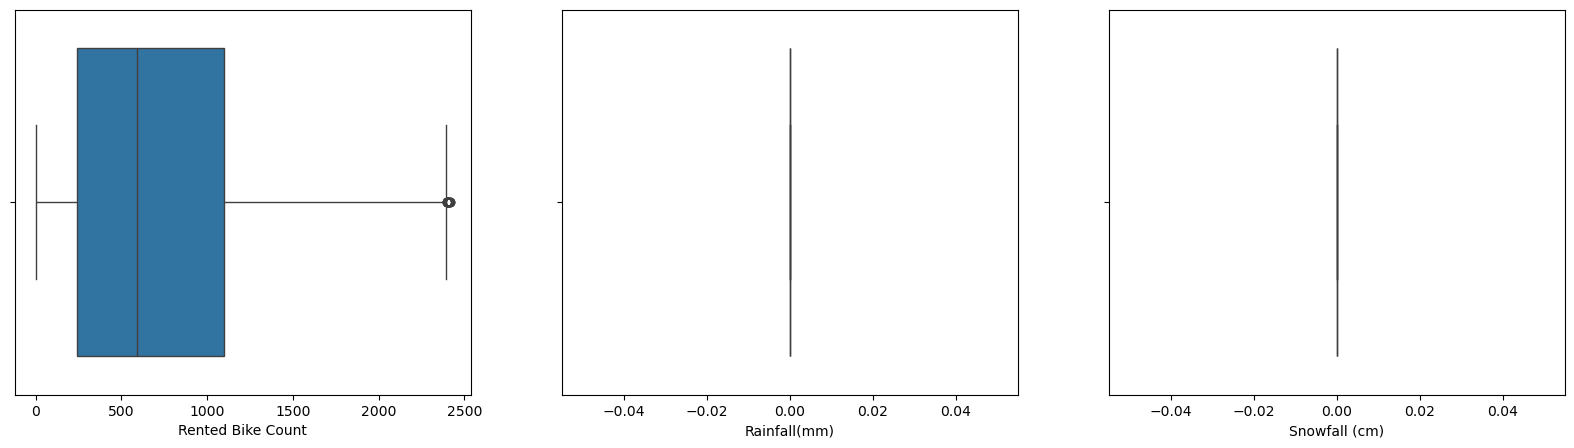

In [22]:
fig, axs = plt.subplots( nrows=1, ncols=3, figsize=(20, 5))

sns.boxplot(x=df['Rented Bike Count'], ax = axs[0])
sns.boxplot(x=df['Rainfall(mm)'], ax = axs[1])
sns.boxplot(x=df['Snowfall (cm)'], ax = axs[2])

In [23]:
bikePerDay = df.groupby('Date').sum()
period_range = pd.period_range(start='2017-11', end='2018-11', freq='M')

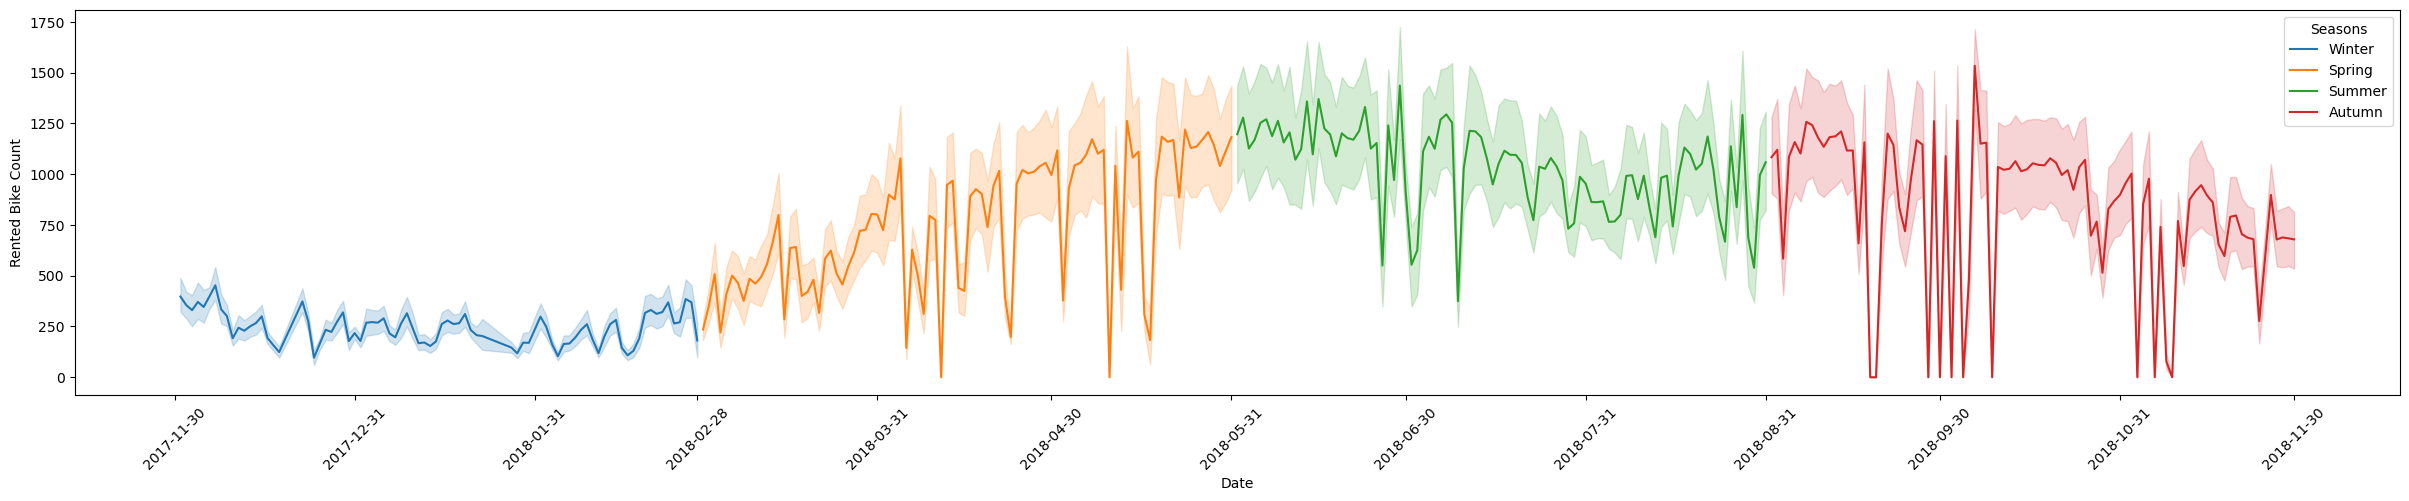

In [24]:
fig, ax = plt.subplots(figsize=(30, 5))
g = sns.lineplot(df,
                 x='Date',
                 y='Rented Bike Count',
                 hue='Seasons')
x = plt.xticks(period_range, rotation=45)

Se presenta un crecimiento después del invierno, en onde podemos observar un creciemento constante, con un algunas interrupciones de la actividad esto es debido a una falta de disponiblidad en 'Functioning Day', variable ajena en lo que se encuentra dentro del dataset y la cual no se especifica su razon. Sin embargo podemos observar un disminición del servicio en los días de otoño y primavera.

In [26]:
df[['Functioning Day', 'Seasons']].value_counts()

Functioning Day  Seasons
1                Spring     1945
                 Summer     1933
                 Autumn     1770
                 Winter     1753
0                Autumn      235
                 Spring       48
Name: count, dtype: int64

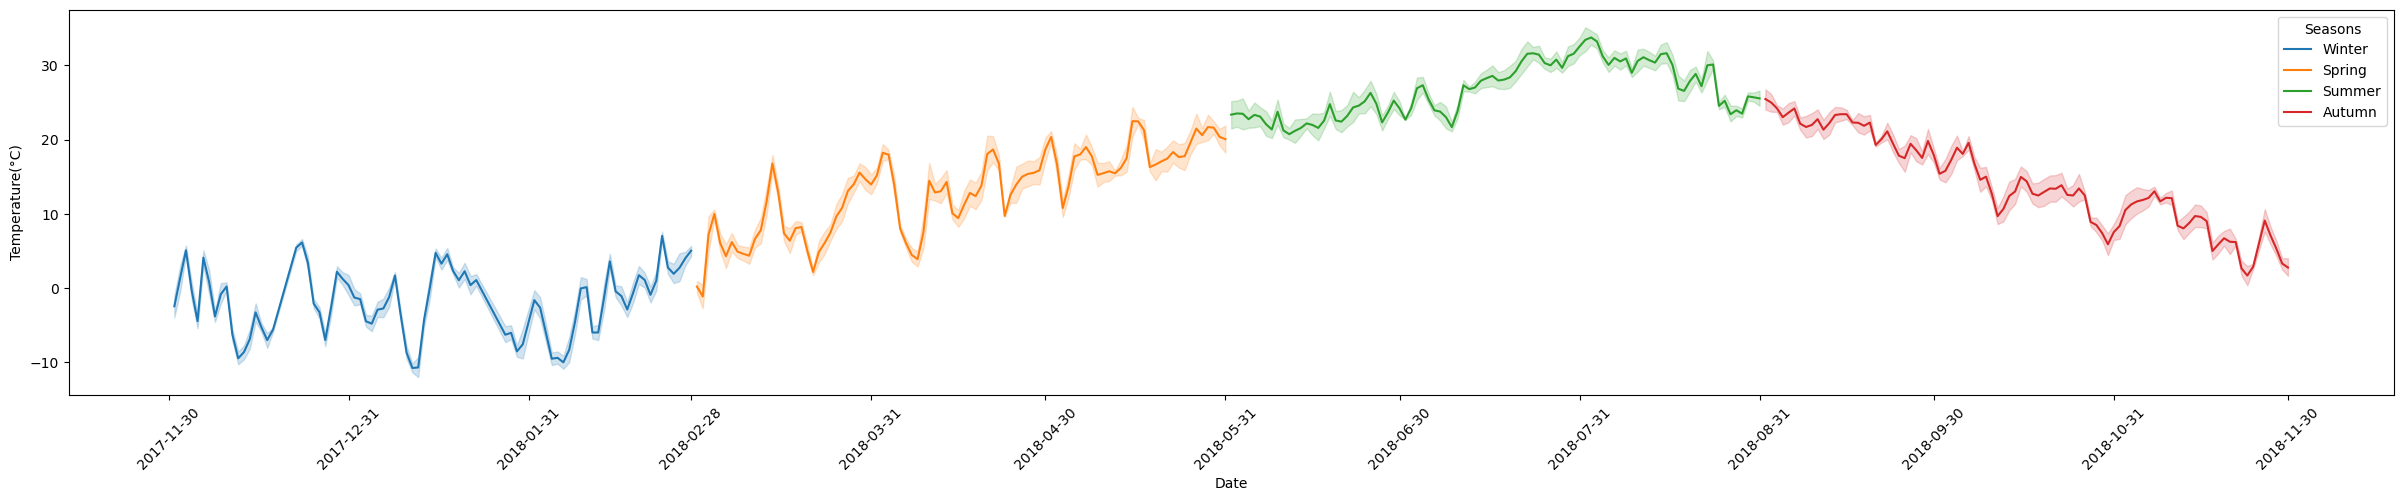

In [27]:
fig, ax = plt.subplots(figsize=(30, 5)) 
p = sns.lineplot(
    data=df, 
    x="Date", 
    y="Temperature(°C)", 
    hue='Seasons'
)
x = plt.xticks(period_range, rotation=45)

Se oberva la variacon de la temperatura a lo largo del año, podemos ver si esta relación respecto a la demanda de bicicleta en donde en verano se observa un aumento de este, sin embargo pueden existir otros factores extenernos que expliquen este aumento como puede ser el turismo, vacaciones u otros.

In [29]:
data_only_avaible = df.copy()
indexNames = data_only_avaible[data_only_avaible['Functioning Day'] == 'No'].index
data_only_avaible.drop(indexNames, inplace=True)


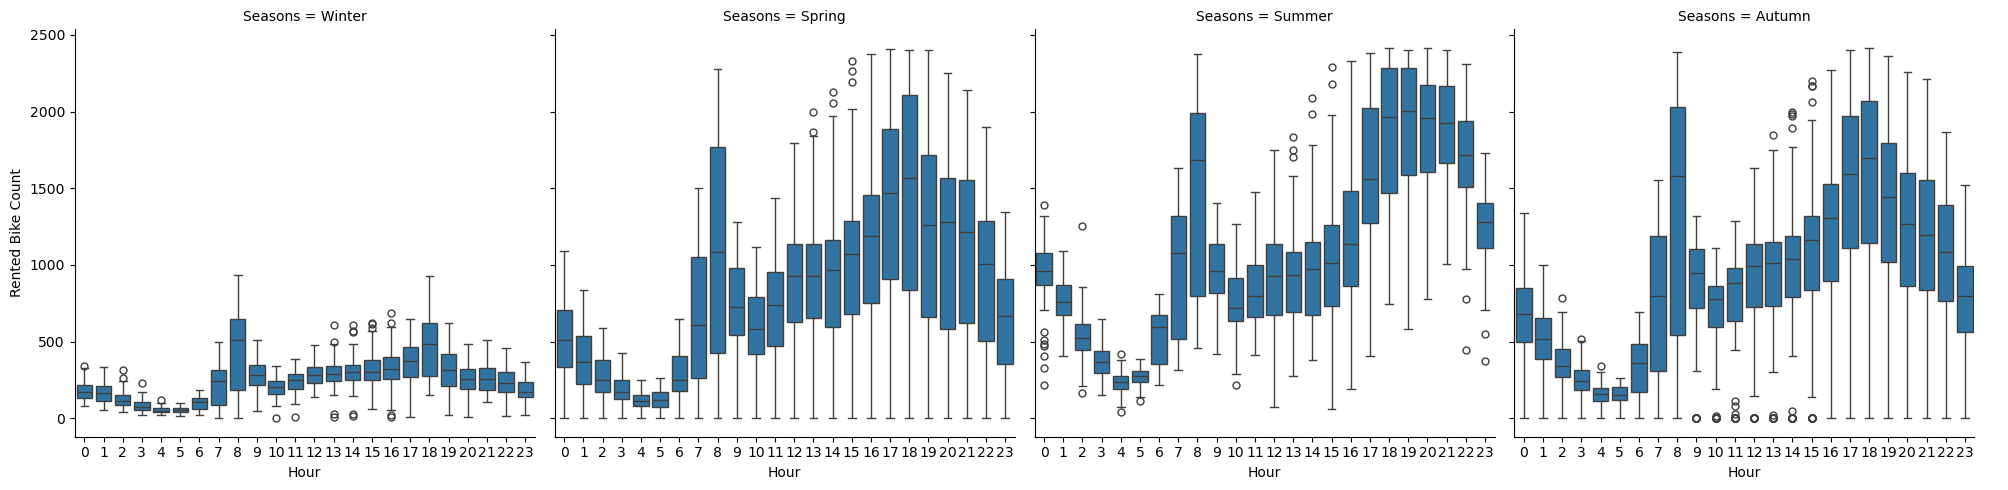

In [30]:
g = sns.catplot(data_only_avaible, x="Hour", y="Rented Bike Count", col="Seasons", kind="box")

Vemos observamos que en general la demanda se concentra entre las 8 de la manñana y 6 de la tarde en donde ademas esta significan el pick en traslados respectivamente, puede ser debido al horario laboral de la personas que se movilizan en el horario de entrada o salida. Por otra parte empieza a disminuir continuamente desde 19 horas hasta la 8 de la mañana. Tambien es bastante notable la falta de demanda por el servicio durante el invierno en contraste otras estaciones del año 

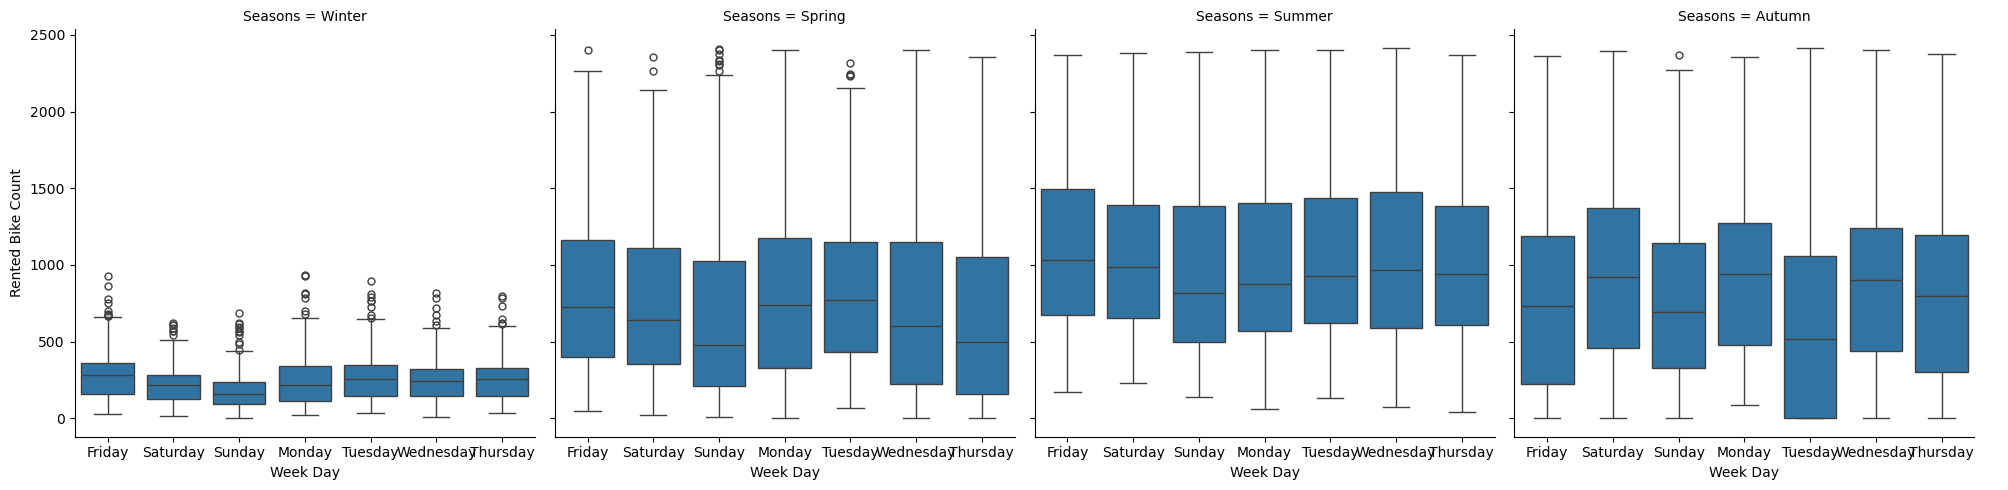

In [32]:
g = sns.catplot(data_only_avaible, x="Week Day", y="Rented Bike Count", col="Seasons", kind="box")

Se presenta un distribucion pareja de la demanda durante los dias de semana, sin embargo destaca la falta de demanda en durante la temporada de invierno posiblemente a las bajas temperaturas

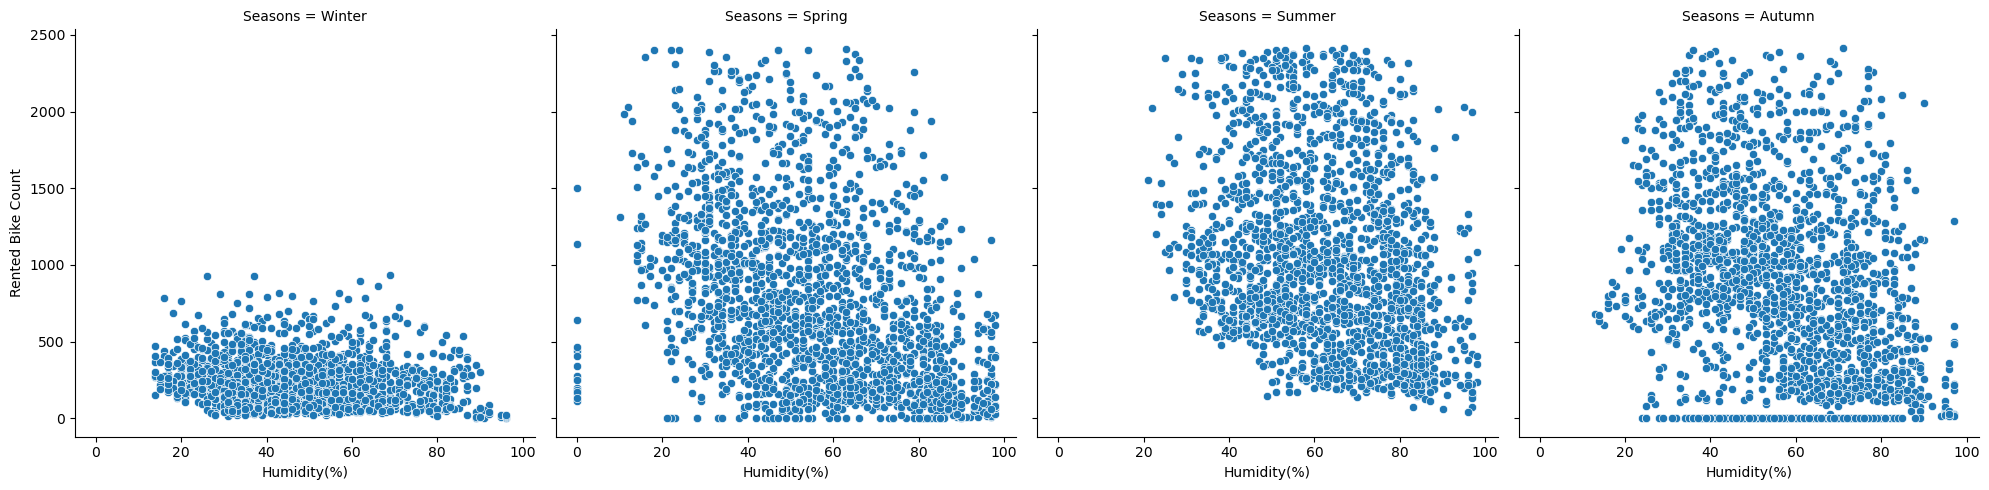

In [34]:
g = sns.relplot(
    data=data_only_avaible,
    x="Humidity(%)", y='Rented Bike Count', col="Seasons",
    kind="scatter"
)

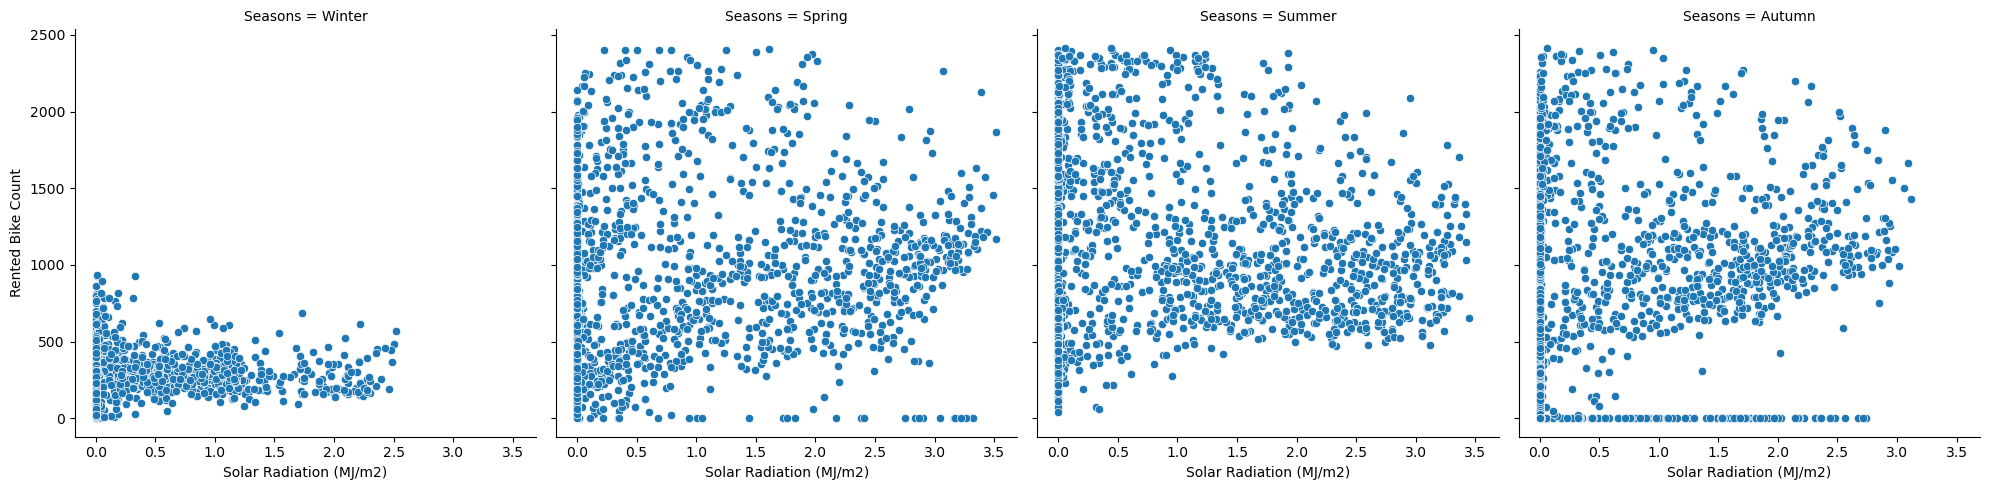

In [35]:
g = sns.relplot(
    data=data_only_avaible,
    x="Solar Radiation (MJ/m2)", y='Rented Bike Count', col="Seasons",
    kind="scatter"
)


In [36]:
df['Visibility (10m)'].describe()

count    7684.000000
mean     1484.492322
std       578.271459
min        27.000000
25%      1037.750000
50%      1749.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

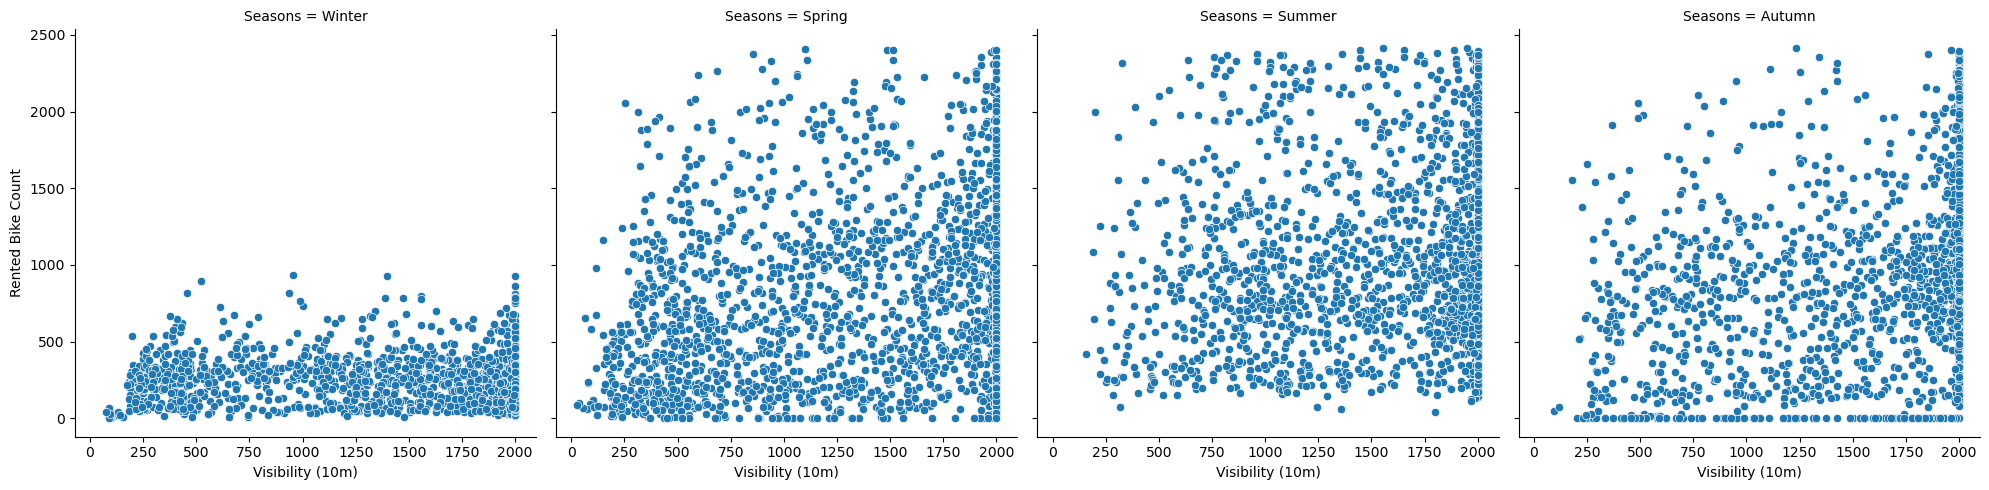

In [37]:
g = sns.relplot(
    data=data_only_avaible,
    x='Visibility (10m)', y='Rented Bike Count', col="Seasons",
    kind="scatter"
)

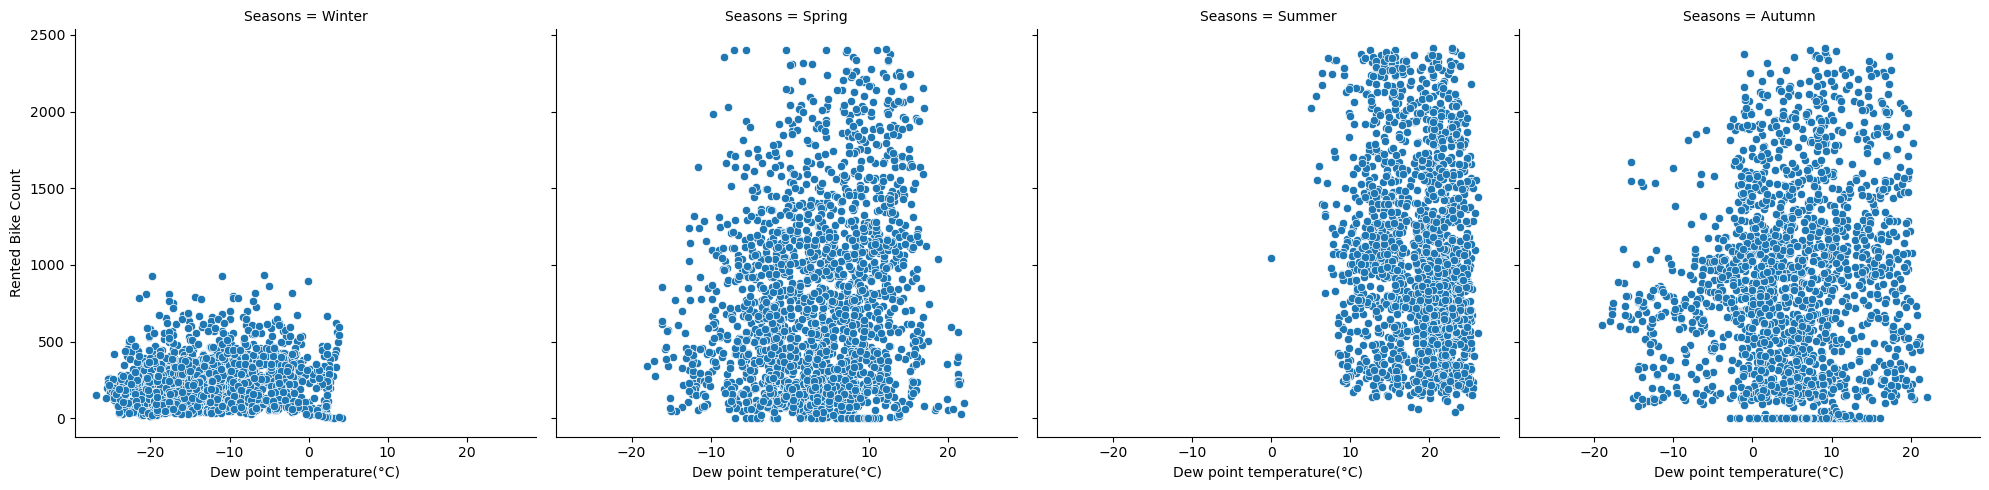

In [38]:
g = sns.relplot(
    data=data_only_avaible,
    x='Dew point temperature(°C)', y='Rented Bike Count', col="Seasons",
    kind="scatter"
)

<Axes: >

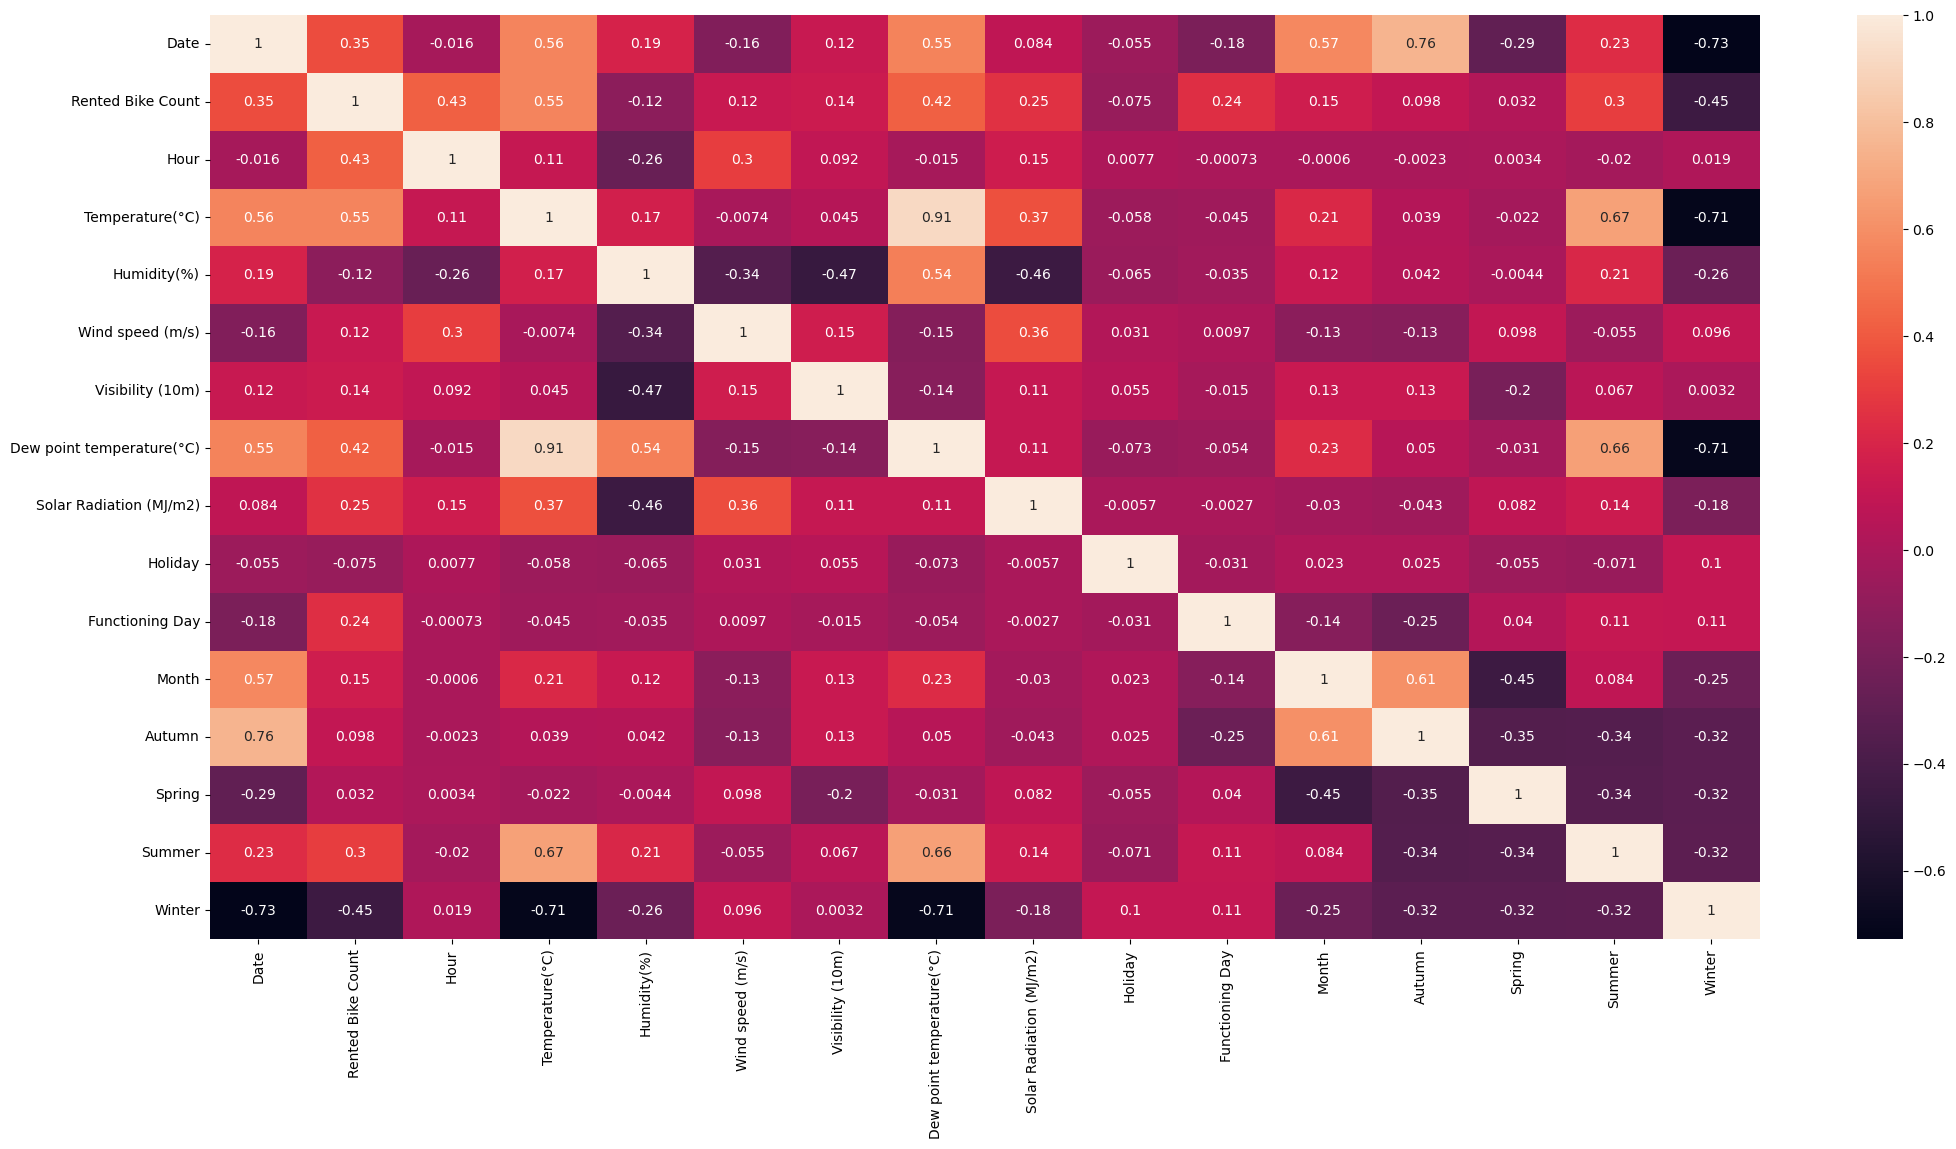

In [40]:
plt.figure(figsize=(25, 12))
sns.heatmap(df[['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Holiday',
       'Functioning Day', 'Month', 'Autumn', 'Spring', 'Summer', 'Winter']].corr(),annot=True)


# Modelos de Machine Learning

* En base a la exploración de datos se eligieron en base a la correlación y relación significativa que muestran con la variable objetivo. Las cuales son: 
  * Date : year-month-day
  * Rented Bike count - Count of bikes rented at each hour
  * Hour - Hour of he day
  * Temperature-Temperature in Celsius
  * Dew point temperature - Celsius
  * Solar radiation - MJ/m2
  * Seasons - Winter, Spring, Summer, Autumn
  * Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [203]:
X=df.drop(['Date','Rented Bike Count','Dew point temperature(°C)',  'Week Day', 'Seasons'],axis=1)
y=df.loc[:,'Rented Bike Count']

In [205]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [207]:
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

### Modelo 1: Regresion Lineal

In [210]:
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()


# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))



Coefficients: 
 [ 6.65512096e+02  1.30853048e+03 -4.84890924e+02  8.29830774e+01
  2.40064405e+01 -1.72341168e+02  1.87054220e+12  1.05283333e+11
 -1.09086032e+02  9.69855365e+02  3.73491592e+01  5.05334025e+15
  5.05334025e+15  5.05334025e+15  5.05334025e+15]
Mean squared error: 141072.02
Coefficient of determination: 0.58


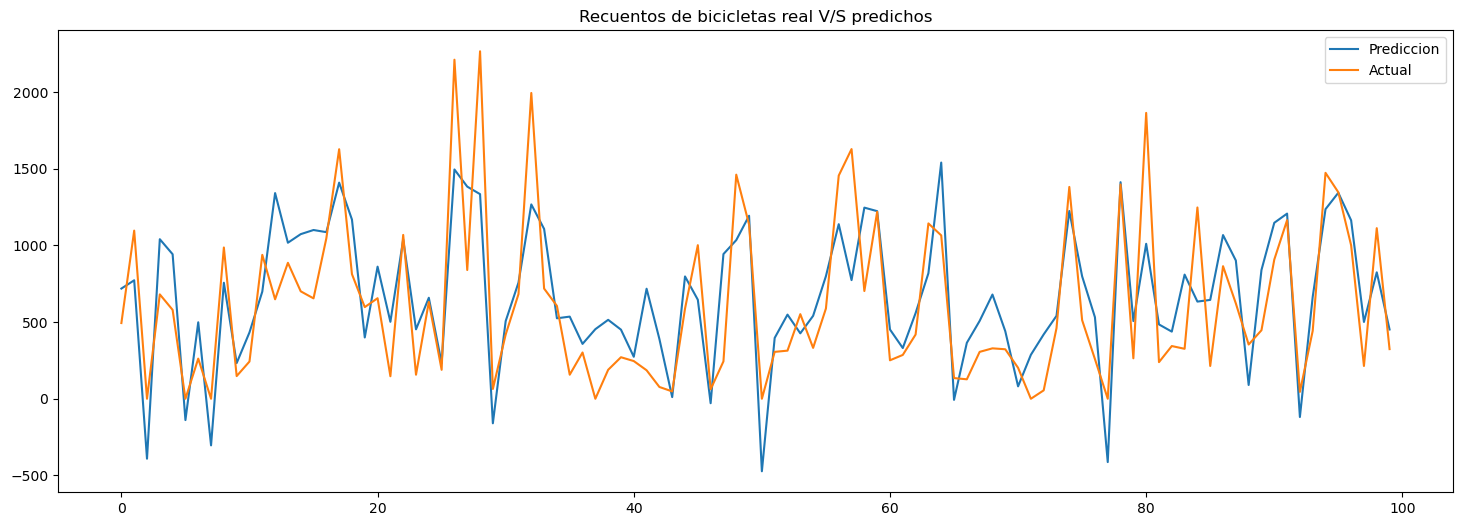

In [214]:
plt.figure(figsize=(18,6))
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Prediccion", "Actual"])
plt.title('Recuentos de bicicletas real V/S predichos')
plt.show()

### Modelo 2: Decision Tree Regression

In [232]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
regr = DecisionTreeRegressor()
regr.fit(X_train,y_train)

y_pred = regr.predict(X_test)
a,p = y_test**2,y_pred**2

# Calculating Evaluation Matrix
mse = mean_squared_error(a,p)
rmse = np.sqrt(mse)
r2 = r2_score(a,p)

# Printing Evaluation Matrix
print("MSE :" , mse)
print("RMSE :" ,rmse)
print("MAE :" ,mean_absolute_error(a,p))
print("Train R2 :", r2_score(y_train**2,regr.predict(X_train)**2))
print("Test R2 :" ,r2)
print("Adjusted R2 : ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

MSE : 545506599133.365
RMSE : 738584.1855424234
MAE : 347927.0110605075
Train R2 : 1.0
Test R2 : 0.6066202974314676
Adjusted R2 :  0.6027408131852297


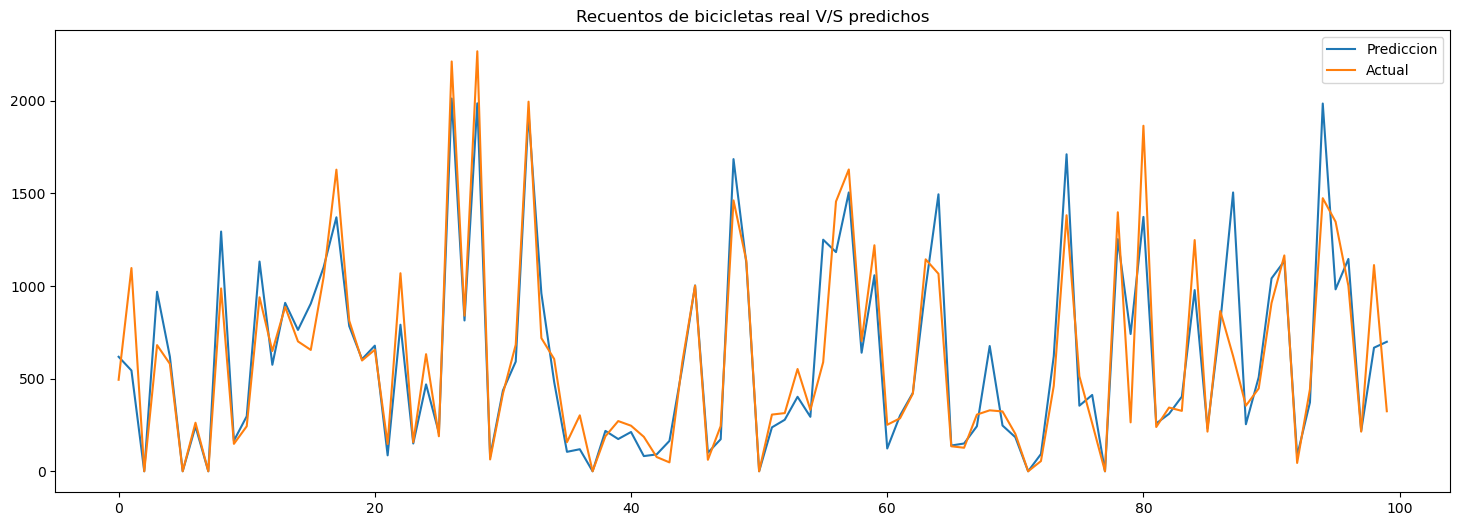

In [234]:
plt.figure(figsize=(18,6))
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Prediccion", "Actual"])
plt.title('Recuentos de bicicletas real V/S predichos')
plt.show()